In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('5000 Sales Records.csv')

# Заменили названия столбцов и поменяли тип данных

In [3]:
df.columns = map(str.lower, df.columns)

In [4]:
df['order date'] = pd.to_datetime(df['order date'])

In [5]:
df['ship date'] = pd.to_datetime(df['ship date'])

# Находим макс. и мин. значения столбцов 'total revenue', 'total cost', 'total profit', 'units sold'

In [6]:
region_sales = df.pivot_table(index=['region'], values=('total revenue', 'total cost', 'total profit', 'units sold'), aggfunc='sum').sort_values('region', ascending=True)
region_sales = region_sales.reset_index()

In [7]:
region_sales

,region,total cost,total profit,total revenue,units sold
0,Asia,6.420394e+08,2.782377e+08,9.202771e+08,3620036
1,Australia and Oceania,4.124295e+08,1.749346e+08,5.873641e+08,2111786
2,Central America and the Caribbean,4.803643e+08,2.046120e+08,6.849763e+08,2698776
3,Europe,1.201946e+09,5.016760e+08,1.703622e+09,6582322
4,Middle East and North Africa,5.354875e+08,2.313803e+08,7.668678e+08,3013431
5,North America,1.097739e+08,4.124040e+07,1.510143e+08,484760
6,Sub-Saharan Africa,1.283425e+09,5.311423e+08,1.814567e+09,6642380


# Находим и мин. значения столбцов 'unit price', 'unit cost'

In [8]:
region_min_units = df.pivot_table(index=['region'], values=('unit price', 'unit cost'), aggfunc='min').sort_values('region', ascending=True)
region_min_units = region_min_units.reset_index()

In [9]:
region_min_units

,region,unit cost,unit price
0,Asia,6.92,9.33
1,Australia and Oceania,6.92,9.33
2,Central America and the Caribbean,6.92,9.33
3,Europe,6.92,9.33
4,Middle East and North Africa,6.92,9.33
5,North America,6.92,9.33
6,Sub-Saharan Africa,6.92,9.33


# Находим и макс. значения столбцов 'unit price', 'unit cost'

In [10]:
region_max_units = df.pivot_table(index=['region'], values=('unit price', 'unit cost'), aggfunc='max').sort_values('region', ascending=True)
region_max_units = region_max_units.reset_index()

In [11]:
region_max_units

,region,unit cost,unit price
0,Asia,524.96,668.27
1,Australia and Oceania,524.96,668.27
2,Central America and the Caribbean,524.96,668.27
3,Europe,524.96,668.27
4,Middle East and North Africa,524.96,668.27
5,North America,524.96,668.27
6,Sub-Saharan Africa,524.96,668.27


# Построение графика зависимости продаж от их типа(онлайн-оффлайн) по регионам

In [12]:
onl = df[df['sales channel'] == 'Online']
offl = df[df['sales channel'] == 'Offline']

In [13]:
online_sales = onl.pivot_table(index=['region'], values=('sales channel'), aggfunc='count').sort_values('region', ascending=False)
online_sales = online_sales.reset_index()
offline_sales = offl.pivot_table(index=['region'], values=('sales channel'), aggfunc='count').sort_values('region', ascending=False)
offline_sales = offline_sales.reset_index()

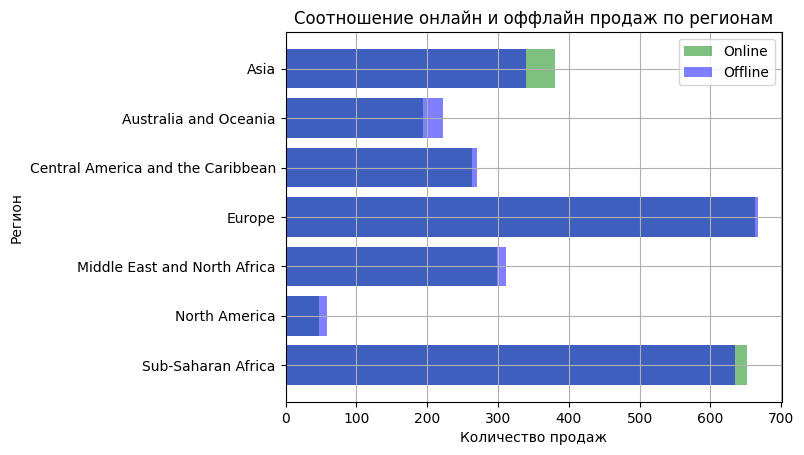

In [14]:
plt.grid()
plt.barh(online_sales['region'], online_sales['sales channel'], alpha = 0.5, color = 'g', label = 'Online')
plt.barh(offline_sales['region'], offline_sales['sales channel'], alpha = 0.5, color = 'b', label = 'Offline')
plt.legend()
plt.ylabel('Регион')
plt.xlabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по регионам')
plt.show()

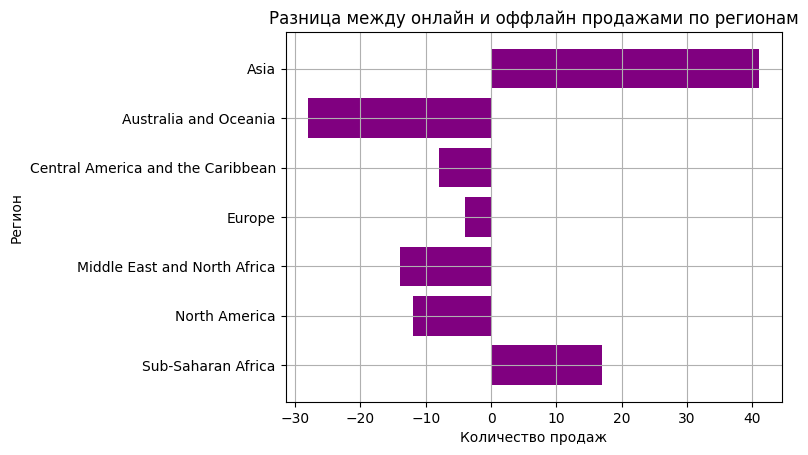

In [15]:
plt.grid()
plt.barh(online_sales['region'], online_sales['sales channel']-offline_sales['sales channel'], color = 'purple')
plt.ylabel('Регион')
plt.xlabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по регионам')
plt.show()

# Разделение таблицы по типам товаров

In [16]:
food_onl = df[((df['item type'] == 'Baby Food') | (df['item type'] == 'Snacks') | (df['item type'] == 'Beverages') | (df['item type'] == 'Cereal') | (df['item type'] == 'Meat') | (df['item type'] == 'Fruits') | (df['item type'] == 'Vegetables')) & (df['sales channel'] == 'Online')]
food_offl = df[((df['item type'] == 'Baby Food') | (df['item type'] == 'Snacks') | (df['item type'] == 'Beverages') | (df['item type'] == 'Cereal') | (df['item type'] == 'Meat') | (df['item type'] == 'Fruits') | (df['item type'] == 'Vegetables')) & (df['sales channel'] == 'Offline')]

In [17]:
items_onl = df[((df['item type'] == 'Personal Care') | (df['item type'] == 'Clothes') | (df['item type'] == 'Office Supplies') | (df['item type'] == 'Cosmetics') | (df['item type'] == 'Household')) & (df['sales channel'] == 'Online')]
items_offl = df[((df['item type'] == 'Personal Care') | (df['item type'] == 'Clothes') | (df['item type'] == 'Office Supplies') | (df['item type'] == 'Cosmetics') | (df['item type'] == 'Household')) & (df['sales channel'] == 'Offline')]

In [18]:
food_onl_sales = food_onl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
food_onl_sales = food_onl_sales.reset_index()
food_offl_sales = food_offl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
food_offl_sales = food_offl_sales.reset_index()
items_onl_sales = items_onl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
items_onl_sales = items_onl_sales.reset_index()
items_offl_sales = items_offl.pivot_table(index=['item type'], values=('sales channel'), aggfunc='count').sort_values('item type', ascending=False)
items_offl_sales = items_offl_sales.reset_index()

# Построение графика зависимости продаж от их типа(онлайн-оффлайн) по типу товара

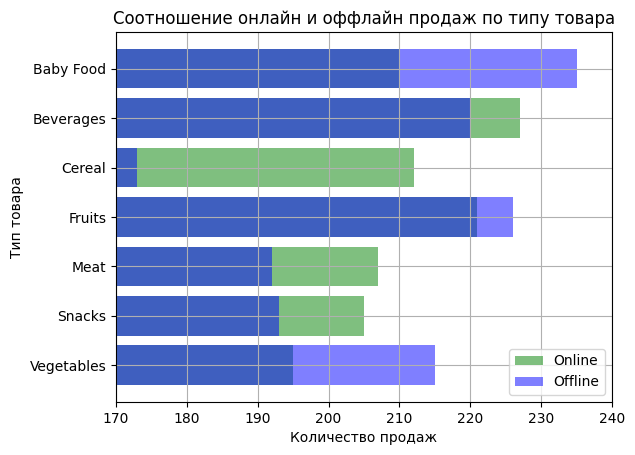

In [19]:
plt.grid()
plt.barh(food_onl_sales['item type'], food_onl_sales['sales channel'], alpha = 0.5, color = 'g', label = 'Online')
plt.barh(food_offl_sales['item type'], food_offl_sales['sales channel'], alpha = 0.5, color = 'b', label = 'Offline')
plt.legend()
plt.xlim(170, 240)
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по типу товара')
plt.show()

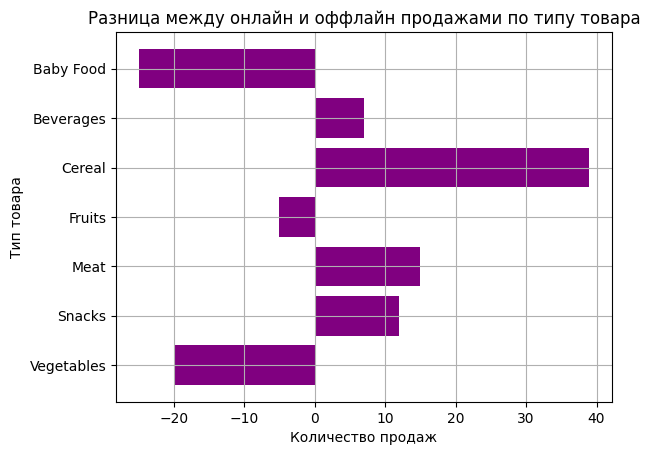

In [20]:
plt.grid()
plt.barh(food_onl_sales['item type'], food_onl_sales['sales channel'] - food_offl_sales['sales channel'], color = 'purple')
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по типу товара')
plt.show()

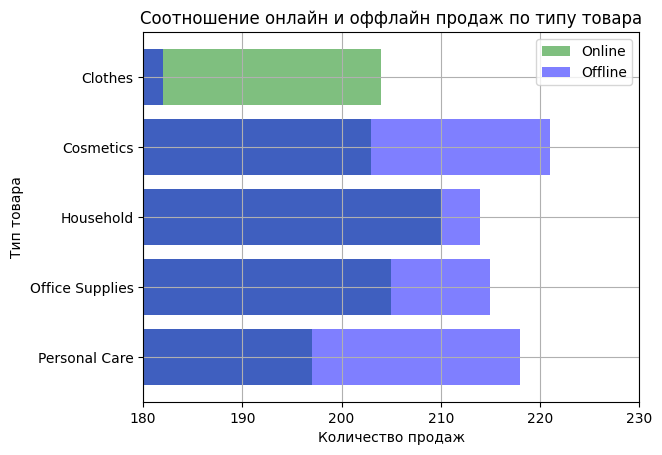

In [21]:
plt.grid()
plt.barh(items_onl_sales['item type'], items_onl_sales['sales channel'], alpha = 0.5, color = 'g', label = 'Online')
plt.barh(items_offl_sales['item type'], items_offl_sales['sales channel'], alpha = 0.5, color = 'b', label = 'Offline')
plt.legend()
plt.xlim(180, 230)
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по типу товара')
plt.show()

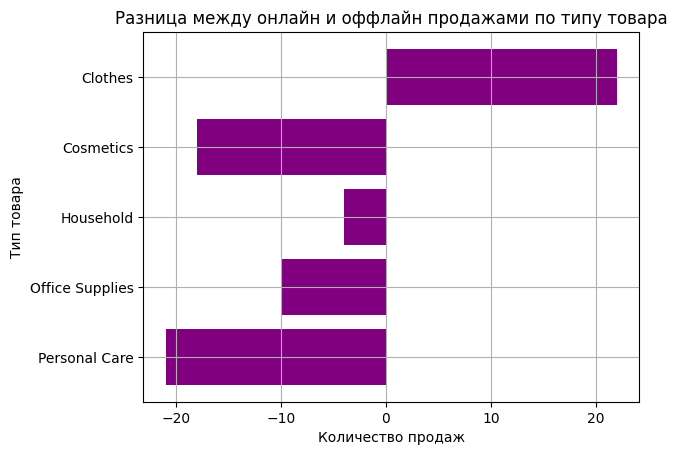

In [22]:
plt.grid()
plt.barh(items_onl_sales['item type'], items_onl_sales['sales channel'] - items_offl_sales['sales channel'], color = 'purple')
plt.ylabel('Тип товара')
plt.xlabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по типу товара')
plt.show()

# Вычисление среднего времени доставки по регионам

In [23]:
delivery = pd.DataFrame(df['region'])
delivery['time'] = df['ship date'] - df['order date']

In [24]:
delivery_time = delivery.pivot_table(index=['region'], values=('time'), aggfunc='mean').sort_values('time', ascending=False)
delivery_time = delivery_time.reset_index()

In [25]:
delivery_time

,region,time
0,North America,25 days 13:48:40.754716981
1,Sub-Saharan Africa,25 days 10:57:48.326848249
2,Middle East and North Africa,25 days 05:06:53.114754098
3,Asia,25 days 03:28:17.357440890
4,Central America and the Caribbean,24 days 21:55:57.303370786
5,Europe,24 days 18:37:21.203007518
6,Australia and Oceania,24 days 06:10:23.076923077


# Построение графика среднего времени доставки по регионам

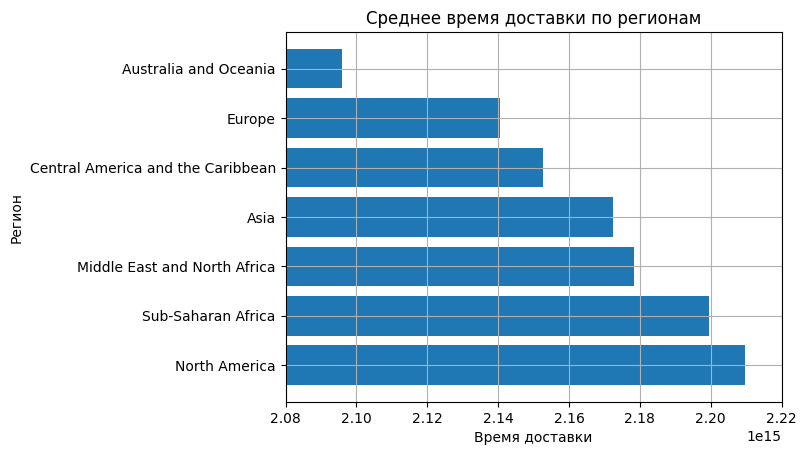

In [26]:
plt.grid()
plt.barh(delivery_time['region'], delivery_time['time'])
plt.title('Среднее время доставки по регионам')
plt.xlabel('Время доставки')
plt.ylabel('Регион')
plt.xlim(2.08e15, 2.22e15)
plt.show()

# Определение распеределения количества заказов от Order Priority

In [27]:
order = df.pivot_table(index=['order priority'], values=('region'), aggfunc='count').sort_values('region', ascending=False)
order = order.reset_index()

In [28]:
order

,order priority,region
0,M,1321
1,H,1278
2,L,1227
3,C,1174


# Построение графика распеределения количества заказов от Order Priority

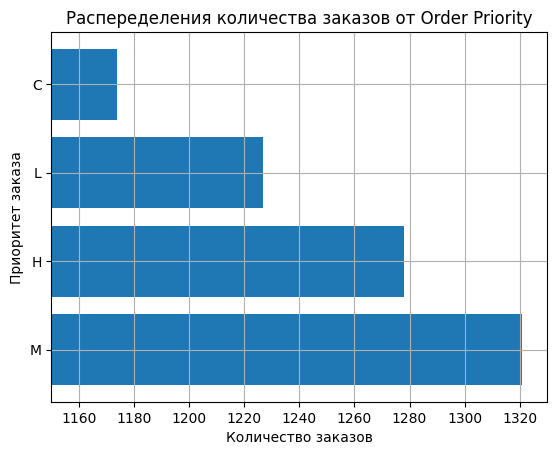

In [29]:
plt.grid()
plt.barh(order['order priority'], order['region'])
plt.title('Распеределения количества заказов от Order Priority')
plt.xlabel('Количество заказов')
plt.ylabel('Приоритет заказа')
plt.xlim(1150, 1330)
plt.show()